# Machine Learning and Data Analysis on Data with allergen concentration measures


## We will try to construct a features-labels dataset from our initial data, in order to try some ML and Data Analysis techniques. We should note that the particular data are not ready for ML and analysis, so we might observe some bad results, but the point of this exercise is just to manipule the data and implement some ML techniques.

### The data we have is in csv format and we created a script to load them (load_data.py). We have data from 2016 and 2017 in different files, so we need to put them together. 


In [1]:
import load_data
import numpy as np
import utils

headers, data1 = load_data.get_POLLEN_2016()
_, data2 = load_data.get_POLLEN_2017()

headers, data1, data2 = np.asarray(headers), np.asarray(data1), np.asarray(data2)

n_attributes = headers.shape[0]

total_data = np.concatenate((data1, data2))

n_samples = total_data.shape[0]


print 'Number of attributes: ' + str(n_attributes) +'\n'

print 'Number of samples: ' + str(n_samples) +'\n'


print 'Headers: ' 
print headers

print '\n'

print 'Example data before removing the first 2 columns: ' 
print total_data[150:155,:]




Number of attributes: 43

Number of samples: 731

Headers: 
['DayCode' 'DayDate' 'Acer' 'Alnus' 'Ambrosia' 'Apiaceae' 'Artemisia'
 'Betula' 'Cannabaceae' 'Carpinus' 'Castanea' 'Chenopodiaceae'
 'Cichorioideae' 'Corylus' 'Cupressaceae' 'Cyperaceae' 'Ericaceae'
 'Fabaceae' 'Fagus' 'Fraxinus' 'Juglans' 'Ligustrum' 'Liquidambar'
 'Moraceae' 'Myricaceae' 'Myrtaceae' 'Olea' 'other Asteroideae'
 'other Oleaceae' 'Papaveraceae' 'Pinaceae' 'Plantago' 'Platanus' 'Poaceae'
 'Populus' 'Quercus' 'Rosaceae' 'Rumex' 'Salix' 'Thalictrum' 'Tilia'
 'Ulmus' 'Urticaceae']


Example data before removing the first 2 columns: 
[['151' 'May 30' '0' '0' '0' '0' '0' '0' '0,9920634921' '0' '0' '0' '0' '0'
  '0,9920634921' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0,9920634921'
  '0' '0' '0' '45,6349206349' '2,9761904762' '0' '10,4166666667' '0'
  '14,880952381' '0' '0,496031746' '0' '2,4801587302' '0' '0'
  '4,4642857143']
 ['152' 'May 31' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '1,4880952381' '0' '

### The first 2 columns of the data are the id and the date of the measurement. We will remove the first and second column from the data and we will keep as a seperate matrix the second column, which has the specific day and month of the measurement: 

In [2]:
total_data_no_dates = total_data[:,2:]
dates = total_data[:,1]

### Next step is to decide which the labels will be. We can think that allergies vary according to months of the year, so for our first try, we will have each month as a label: 

### (We set every month to be a number (e.g. January=1))

In [3]:
months_nums=[1,2,3,4,5,6,7,8,9,10,11,12]
months_text=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

months_labels = []

for date in dates:

    for i in range(12):
        if months_text[i] in date:
            months_labels.append(months_nums[i])

months_labels = np.asarray(months_labels)

months_labels = months_labels.reshape((months_labels.shape[0],1))

In [4]:
print dates[25:35]
print months_labels[25:35]

['Jan 26' 'Jan 27' 'Jan 28' 'Jan 29' 'Jan 30' 'Jan 31' 'Feb 01' 'Feb 02'
 'Feb 03' 'Feb 04']
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]]


### Now we want to form our final dataset. In case we use an algorithm that processes each sample individually(e.g. C-E elimination), then we dont want our data to be sorted by the labels. So, the next step is to shuffle our data. In order to do that, we will merge them, shuffle them and split them again into features and labels:

In [5]:
data_to_shuffle = np.concatenate((months_labels, total_data_no_dates), axis = 1)

np.random.shuffle(data_to_shuffle)

labels = data_to_shuffle[:,0]
data = data_to_shuffle[:,1:]

### The last step of our data pre-processing is to fix the float values of our data which use a comma instead of a dot for the decimal. This happens because the data were created in Greece, where we use a comma for the decimal in a float number.

In [6]:
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if ',' in data[i,j]:
            data[i,j] = data[i,j].replace(',','.')
        else:
            data[i,j] = data[i,j]+'.'
#We also observed during debugging that some fields are null, so we set a value of zero for these fields
        if data[i,j]=='.':
            data[i,j]='0.'

data = data.astype(np.float)


## So, our data are ready for some ML things! 

### Let's stay simple for this task. Let's try to train a decision tree: 

### We have 731 samples, which is not a very large number. So, we might want to use an evaluation method in order to avoid overfitting and test our model to unseen data. We chose the cross-validation (We use sci-kit learn for the next tasks):

### First, we will try to overfit our decision tree, in order to know if our model can actually learn. We will see that this model "partly" overfits the data. This means that we may need to do some more pre-processing or to change the labels for our task.

Scores for the 10 models that were created by the CV:
0.666666666667


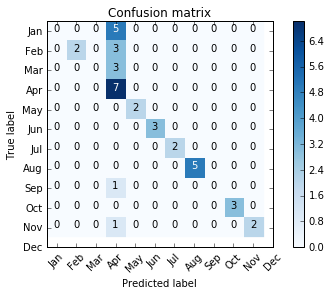

Recall for each label: 
[ 0.          0.4         0.          1.          1.          1.          1.
  1.          0.          1.          0.66666667]


In [7]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

clf = tree.DecisionTreeClassifier()
clf.fit(data[1:40,:],labels[1:40])

y_pred = clf.predict(data[1:40])


scores = accuracy_score(labels[1:40],y_pred)
conf_mat = confusion_matrix(labels[1:40],y_pred)

print 'Scores for the 10 models that were created by the CV:'
print scores

utils.plot_confusion_matrix(conf_mat, classes=months_text,
                      title='Confusion matrix')

from sklearn.metrics import recall_score

print 'Recall for each label: '
print recall_score(labels[1:40], y_pred, average=None)  

Scores for the 10 models that were created by the CV:
[ 0.4556962   0.49367089  0.48611111  0.52777778  0.47222222  0.52777778
  0.44444444  0.32394366  0.52112676  0.52112676]


The mean score: 
0.477389760504


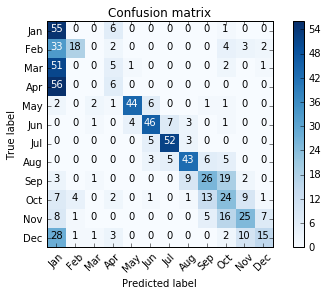

Recall for each label: 
[ 0.88709677  0.29032258  0.          0.09677419  0.77192982  0.74193548
  0.86666667  0.69354839  0.43333333  0.38709677  0.40322581  0.25      ]


In [8]:
scores = cross_val_score(clf, data, labels, cv=10)
y_pred = cross_val_predict(clf, data, labels, cv=10)
conf_mat = confusion_matrix(labels,y_pred)

print 'Scores for the 10 models that were created by the CV:'
print scores
print '\n'
print 'The mean score: '
print scores.mean()

utils.plot_confusion_matrix(conf_mat, classes=months_text,
                      title='Confusion matrix')

print 'Recall for each label: '
print recall_score(labels, y_pred, average=None)  

### We observe that we have a mean score of 50%, which is not bad if we consider that the random pick probability would be 1/12 = 8.333%

### If we look at the confusion matrix, we can see that our model confuses very often the months of the same season, especially for the winter. 

### March is the worst label as we can see, because our model did not classify any value of March to the right month.

### So, it is obvious that we will get a much more accurate model if we substitute the current labels with the seasons. Let's confirm it below:

Scores for the 10 models that were created by the CV:
[ 0.72368421  0.68        0.74324324  0.67567568  0.69444444  0.59722222
  0.72222222  0.63888889  0.73611111  0.625     ]


The mean score: 
0.683649201833


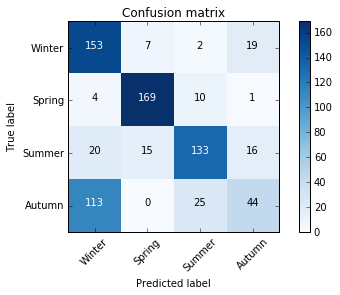

Recall for each label: 
[ 0.84530387  0.91847826  0.72282609  0.24175824]


In [9]:
seasons_numbers = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
seasons_text = ['Winter', 'Spring', 'Summer', 'Autumn']
#1 -> Winter, 2 -> Spring, 3 -> Summer, 4 -> Autumn (for  every month)

season_labels = []

for date in dates:

    for i in range(12):
        if months_text[i] in date:
            season_labels.append(seasons_numbers[i])
            
season_labels = np.asarray(season_labels)

season_labels = season_labels.reshape((season_labels.shape[0],1))

data_to_shuffle = np.concatenate((season_labels, total_data_no_dates), axis = 1)

np.random.shuffle(data_to_shuffle)

labels = data_to_shuffle[:,0]
data = data_to_shuffle[:,1:]

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if ',' in data[i,j]:
            data[i,j] = data[i,j].replace(',','.')
        else:
            data[i,j] = data[i,j]+'.'
#We also observed during debugging that some fields are null, so we set a value of zero for these fields
        if data[i,j]=='.':
            data[i,j]='0.'

data = data.astype(np.float)


scores = cross_val_score(clf, data, labels, cv=10)
y_pred = cross_val_predict(clf, data, labels, cv=10)
conf_mat = confusion_matrix(labels,y_pred)

print 'Scores for the 10 models that were created by the CV:'
print scores
print '\n'
print 'The mean score: '
print scores.mean()

utils.plot_confusion_matrix(conf_mat, classes=seasons_text,
                      title='Confusion matrix')

from sklearn.metrics import recall_score

print 'Recall for each label: '
print recall_score(labels, y_pred, average=None)  

### We indeed have better results than before and we can make it even better, if we merge Winter with Autumn which either way are non-important seasons for allergies (that's an assumption): 

Scores for the 10 models that were created by the CV:
[ 0.86666667  0.86666667  0.88        0.83783784  0.76388889  0.86111111
  0.90277778  0.875       0.86111111  0.86111111]


The mean score: 
0.857617117117


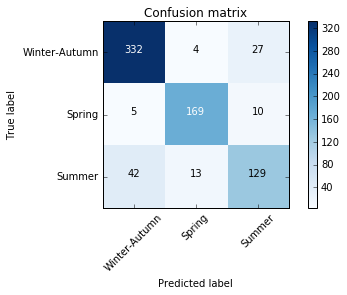

Recall for each label: 
[ 0.91460055  0.91847826  0.70108696]


In [10]:
seasons_numbers = [1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1]
seasons_text = ['Winter-Autumn', 'Spring', 'Summer']
#1 -> Winter-Autumn, 2 -> Spring, 3 -> Summer

season_labels = []

for date in dates:

    for i in range(12):
        if months_text[i] in date:
            season_labels.append(seasons_numbers[i])
            
season_labels = np.asarray(season_labels)

season_labels = season_labels.reshape((season_labels.shape[0],1))

data_to_shuffle = np.concatenate((season_labels, total_data_no_dates), axis = 1)

np.random.shuffle(data_to_shuffle)

labels = data_to_shuffle[:,0]
data = data_to_shuffle[:,1:]

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if ',' in data[i,j]:
            data[i,j] = data[i,j].replace(',','.')
        else:
            data[i,j] = data[i,j]+'.'
#We also observed during debugging that some fields are null, so we set a value of zero for these fields
        if data[i,j]=='.':
            data[i,j]='0.'

data = data.astype(np.float)


scores = cross_val_score(clf, data, labels, cv=10)
y_pred = cross_val_predict(clf, data, labels, cv=10)
conf_mat = confusion_matrix(labels,y_pred)

print 'Scores for the 10 models that were created by the CV:'
print scores
print '\n'
print 'The mean score: '
print scores.mean()

utils.plot_confusion_matrix(conf_mat, classes=seasons_text,
                      title='Confusion matrix')

from sklearn.metrics import recall_score

print 'Recall for each label: '
print recall_score(labels, y_pred, average=None)  

### Hence, we have a model (or 3 models) that could give us good results regarging this simple task we implemented.


### This was a very simple and easy example of a possible way of classification of any data you could find. Since, we did not have a specific goal, we had the freedom to change our labels and get a good result that makes sense from our model.

### The whole code can be found on main.py file.